# 时间序列（time series）
时间序列（time series）数据是一种重要的结构化数据形式。时间序列数据的意义取决于具体的应用场景，主要有以下几种：
* 时间戳（timestamp），特定的时刻。
* 固定时期（period），如2007年1月或2010年全年。
* 时间间隔（interval），由起始和结束时间戳表示。时期（period）可以被看做间隔（interval）的特例。
* 实验或过程时间，每个时间点都是相对于特定起始时间的一个度量。例如，从放入烤箱时起，每秒钟饼干的直径。

<br>
pandas提供了许多内置的时间序列处理工具和数据算法。因此，你可以高效处理非常大的时间序列，轻松地进行切片/切块、聚合、对定期/不定期的时间序列进行重采样等。
# 日期和时间数据类型及工具
Python标准库包含用于日期（date）和时间（time）数据的数据类型，而且还有日历方面的功能。我们主要会用到datetime、time以及calendar模块。datetime.datetime（也可以简写为datetime）是用得最多的数据类型：

In [6]:
from datetime import datetime
now=datetime.now()
now

datetime.datetime(2018, 7, 28, 18, 7, 41, 940759)

In [5]:
now.year,now.month,now.day

(2018, 7, 28)

datetime以毫秒形式存储日期和时间。timedelta表示两个datetime对象之间的时间差：

In [9]:
delta=datetime(2018,7,7,1,1,1)-datetime(2018,6,6,2,2,2)

In [10]:
delta.days,delta.seconds,delta.microseconds

(30, 82739, 0)

可以给datetime对象加上（或减去）一个或多个timedelta，这样会产生一个新对象：

In [11]:
from datetime import timedelta
start=datetime(2018,8,8)
end=start+timedelta(12)
start,end

(datetime.datetime(2018, 8, 8, 0, 0), datetime.datetime(2018, 8, 20, 0, 0))

datetime模块中的数据类型:
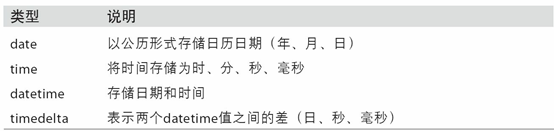

# 字符串和datetime的相互转换

In [12]:
dt=datetime(2018,8,8)
str(dt)

'2018-08-08 00:00:00'

In [14]:
dt.strftime('%Y/%m/%d')

'2018/08/08'

In [15]:
ls=["%y 两位数的年份表示（00-99）"
,"%Y 四位数的年份表示（000-9999）"
,"%m 月份（01-12）"
,"%d 月内中的一天（0-31）"
,"%H 24小时制小时数（0-23）"
,"%I 12小时制小时数（01-12）"
,"%M 分钟数（00=59）"
,"%S 秒（00-59）"
,"%a 本地简化星期名称"
,"%A 本地完整星期名称"
,"%b 本地简化的月份名称"
,"%B 本地完整的月份名称"
,"%c 本地相应的日期表示和时间表示"
,"%j 年内的一天（001-366）"
,"%p 本地A.M.或P.M.的等价符"
,"%U 一年中的星期数（00-53）星期天为星期的开始"
,"%w 星期（0-6），星期天为星期的开始"
,"%W 一年中的星期数（00-53）星期一为星期的开始"
,"%x 本地相应的日期表示"
,"%X 本地相应的时间表示"
,"%Z 当前时区的名称"
,"%% %号本身"]
for i in ls:
    print('{0:30}-----{1}'.format(datetime.now().strftime(i[:2]),i))

18                            -----%y 两位数的年份表示（00-99）
2018                          -----%Y 四位数的年份表示（000-9999）
07                            -----%m 月份（01-12）
28                            -----%d 月内中的一天（0-31）
18                            -----%H 24小时制小时数（0-23）
06                            -----%I 12小时制小时数（01-12）
30                            -----%M 分钟数（00=59）
08                            -----%S 秒（00-59）
Sat                           -----%a 本地简化星期名称
Saturday                      -----%A 本地完整星期名称
Jul                           -----%b 本地简化的月份名称
July                          -----%B 本地完整的月份名称
Sat Jul 28 18:30:08 2018      -----%c 本地相应的日期表示和时间表示
209                           -----%j 年内的一天（001-366）
PM                            -----%p 本地A.M.或P.M.的等价符
29                            -----%U 一年中的星期数（00-53）星期天为星期的开始
6                             -----%w 星期（0-6），星期天为星期的开始
30                            -----%W 一年中的星期数（00-53）星期一为星期的开始
07/28/18                      -----%x 本地相应的日期表示
18:30:08 

In [16]:
datetime.strptime('2018-08-08','%Y-%m-%d')

datetime.datetime(2018, 8, 8, 0, 0)

datetime.strptime是通过已知格式进行日期解析的最佳方式。但是每次都要编写格式定义是很麻烦的事情，尤其是对于一些常见的日期格式。这种情况下，你可以用dateutil这个第三方包中的parser.parse方法（pandas中已经自动安装好了）：

In [17]:
from dateutil.parser import parse
parse('20180818')

datetime.datetime(2018, 8, 18, 0, 0)

在国际通用的格式中，日出现在月的前面很普遍，传入dayfirst=True即可解决这个问题：

In [22]:
parse('06-08-11',dayfirst=True)

datetime.datetime(2011, 8, 6, 0, 0)

pandas通常是用于处理成组日期的，不管这些日期是DataFrame的轴索引还是列。to_datetime方法可以解析多种不同的日期表示形式。

In [25]:
import pandas as pd
dts=['2017-07-07','2018-08-08']
pd.to_datetime(dts)

DatetimeIndex(['2017-07-07', '2018-08-08'], dtype='datetime64[ns]', freq=None)

它还可以处理缺失值（None、空字符串等）：

In [26]:
pd.to_datetime(dts+[None])

DatetimeIndex(['2017-07-07', '2018-08-08', 'NaT'], dtype='datetime64[ns]', freq=None)

NaT（Not a Time）是pandas中时间戳数据的null值。<br>

In [28]:
import tushare as ts
df=ts.get_k_data('600519',start='2018-05-05')
df.tail()

,date,open,close,high,low,volume,code
134,2018-07-23,736.00,732.07,741.15,720.01,35969.0,600519
135,2018-07-24,732.68,745.40,747.30,723.00,41808.0,600519
136,2018-07-25,746.95,743.81,749.88,740.01,21743.0,600519
137,2018-07-26,748.90,735.62,748.90,734.23,23067.0,600519
138,2018-07-27,736.00,738.56,744.30,730.00,20913.0,600519


In [29]:
type(df.iloc[0,0])

str

In [30]:
pd.to_datetime(df.date).tail()

134   2018-07-23
135   2018-07-24
136   2018-07-25
137   2018-07-26
138   2018-07-27
Name: date, dtype: datetime64[ns]

In [31]:
df.date=pd.to_datetime(df.date)
df.tail()

,date,open,close,high,low,volume,code
134,2018-07-23,736.00,732.07,741.15,720.01,35969.0,600519
135,2018-07-24,732.68,745.40,747.30,723.00,41808.0,600519
136,2018-07-25,746.95,743.81,749.88,740.01,21743.0,600519
137,2018-07-26,748.90,735.62,748.90,734.23,23067.0,600519
138,2018-07-27,736.00,738.56,744.30,730.00,20913.0,600519


In [32]:
df.dtypes

date      datetime64[ns]
open             float64
close            float64
high             float64
low              float64
volume           float64
code              object
dtype: object

In [33]:
df.set_index(keys=['date'],inplace=True)

In [34]:
df.tail()

,open,close,high,low,volume,code
date,,,,,,
2018-07-23,736.00,732.07,741.15,720.01,35969.0,600519
2018-07-24,732.68,745.40,747.30,723.00,41808.0,600519
2018-07-25,746.95,743.81,749.88,740.01,21743.0,600519
2018-07-26,748.90,735.62,748.90,734.23,23067.0,600519
2018-07-27,736.00,738.56,744.30,730.00,20913.0,600519


In [36]:
df.index

DatetimeIndex(['2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18', '2018-05-21', '2018-05-22',
               '2018-05-23', '2018-05-24', '2018-05-25', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-04', '2018-06-05', '2018-06-06', '2018-06-07',
               '2018-06-08', '2018-06-11', '2018-06-12', '2018-06-13',
               '2018-06-14', '2018-06-15', '2018-06-19', '2018-06-20',
               '2018-06-21', '2018-06-22', '2018-06-25', '2018-06-26',
               '2018-06-27', '2018-06-28', '2018-06-29', '2018-07-02',
               '2018-07-03', '2018-07-04', '2018-07-05', '2018-07-06',
               '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
               '2018-07-13', '2018-07-16', '2018-07-17', '2018-07-18',
               '2018-07-19', '2018-07-20', '2018-07-23', '2018-07-24',
      

# 索引、选取、子集构造
当你根据标签索引选取数据时，时间序列和其它的pandas.Series很像：

In [37]:
df.loc[df.index[-1],:]

open         736
close     738.56
high       744.3
low          730
volume     20913
code      600519
Name: 2018-07-27 00:00:00, dtype: object

In [43]:
df.loc['26-07-2018',:]

open       748.9
close     735.62
high       748.9
low       734.23
volume     23067
code      600519
Name: 2018-07-26 00:00:00, dtype: object

In [46]:
df.loc['2018-7',:]#获得指定月份的切片数据

,open,close,high,low,volume,code
date,,,,,,
2018-07-02,734.52,711.55,739.33,703.00,37558.0,600519
2018-07-03,709.76,694.92,715.78,678.23,82837.0,600519
2018-07-04,692.00,690.91,700.00,688.00,37990.0,600519
2018-07-05,700.00,702.39,716.20,700.00,47123.0,600519
2018-07-06,707.00,714.12,720.93,699.26,44156.0,600519
2018-07-09,720.03,727.24,729.86,719.73,40572.0,600519
2018-07-10,729.00,725.76,731.50,713.33,29010.0,600519
2018-07-11,710.00,719.58,724.00,702.22,24278.0,600519
2018-07-12,718.00,737.54,741.17,718.00,40170.0,600519


In [47]:
df.loc['2018',:]# 获得指定年份的切片数据

,open,close,high,low,volume,code
date,,,,,,
2018-05-07,650.711,688.396,692.054,648.561,85591.0,600519
2018-05-08,688.258,698.906,702.160,688.258,62497.0,600519
2018-05-09,699.153,692.123,702.328,687.360,32331.0,600519
2018-05-10,693.651,704.191,705.976,693.651,39293.0,600519
2018-05-11,708.628,707.968,720.273,705.680,39141.0,600519
2018-05-14,713.864,732.016,732.598,713.864,51014.0,600519
2018-05-15,735.556,732.657,735.990,723.724,38055.0,600519
2018-05-16,729.640,724.237,735.221,723.014,30795.0,600519
2018-05-17,724.828,717.197,727.175,713.864,28517.0,600519


In [50]:
df.loc['2018-06-01':'2018-06-15',:]#获得指定时间段的切片，且包含收尾数据行

,open,close,high,low,volume,code
date,,,,,,
2018-06-01,740.614,734.679,744.410,728.417,36177.0,600519
2018-06-04,741.817,771.022,771.939,735.438,73805.0,600519
2018-06-05,775.489,777.017,783.574,766.349,52629.0,600519
2018-06-06,776.968,774.750,789.737,771.348,48969.0,600519
2018-06-07,778.920,770.036,784.412,767.995,39167.0,600519
2018-06-08,769.080,767.059,774.897,759.220,34958.0,600519
2018-06-11,765.185,764.870,774.996,757.573,36547.0,600519
2018-06-12,767.108,788.001,792.251,765.629,55287.0,600519
2018-06-13,788.800,779.265,791.383,777.836,35244.0,600519


In [53]:
df.loc['2018-06-30':,:]# 获得指定首尾到相关界限的数据

,open,close,high,low,volume,code
date,,,,,,
2018-07-02,734.52,711.55,739.33,703.00,37558.0,600519
2018-07-03,709.76,694.92,715.78,678.23,82837.0,600519
2018-07-04,692.00,690.91,700.00,688.00,37990.0,600519
2018-07-05,700.00,702.39,716.20,700.00,47123.0,600519
2018-07-06,707.00,714.12,720.93,699.26,44156.0,600519
2018-07-09,720.03,727.24,729.86,719.73,40572.0,600519
2018-07-10,729.00,725.76,731.50,713.33,29010.0,600519
2018-07-11,710.00,719.58,724.00,702.22,24278.0,600519
2018-07-12,718.00,737.54,741.17,718.00,40170.0,600519


In [54]:
df.loc[df.index[[0,2,4]],:]

,open,close,high,low,volume,code
date,,,,,,
2018-05-07,650.711,688.396,692.054,648.561,85591.0,600519
2018-05-09,699.153,692.123,702.328,687.360,32331.0,600519
2018-05-11,708.628,707.968,720.273,705.680,39141.0,600519


# 检查重复索引的时间序列

In [55]:
df.index.is_unique

True

# 生成日期范围
pandas.date_range可用于根据指定的频率生成指定长度的DatetimeIndex

In [56]:
index=pd.date_range('20180808','2018/8/18')
index

DatetimeIndex(['2018-08-08', '2018-08-09', '2018-08-10', '2018-08-11',
               '2018-08-12', '2018-08-13', '2018-08-14', '2018-08-15',
               '2018-08-16', '2018-08-17', '2018-08-18'],
              dtype='datetime64[ns]', freq='D')

In [57]:
pd.date_range(start='20180808',periods=5)

DatetimeIndex(['2018-08-08', '2018-08-09', '2018-08-10', '2018-08-11',
               '2018-08-12'],
              dtype='datetime64[ns]', freq='D')

生成一个由每月最后一个工作日组成的日期索引，可以传入"BM"频率,样就只会包含时间间隔内（或刚好在边界上的）符合频率要求的日期：

In [60]:
pd.date_range(start='20170831',end='2018-05-31',freq='BM')

DatetimeIndex(['2017-08-31', '2017-09-29', '2017-10-31', '2017-11-30',
               '2017-12-29', '2018-01-31', '2018-02-28', '2018-03-30',
               '2018-04-30', '2018-05-31'],
              dtype='datetime64[ns]', freq='BM')

基本的时间序列频率:
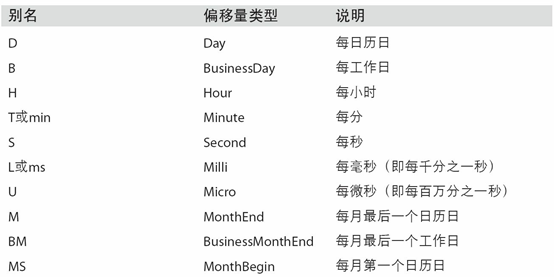

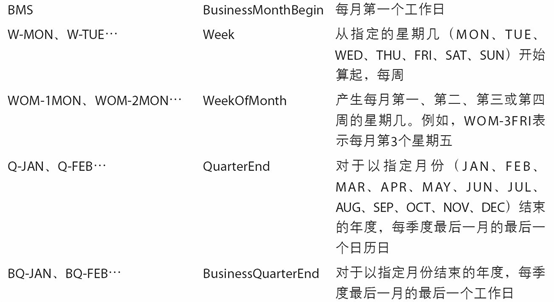

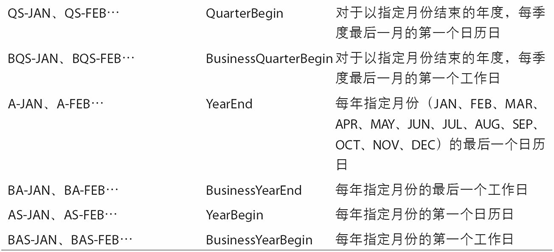
有时，虽然起始和结束日期带有时间信息，但你希望产生一组被规范化（normalize）到午夜的时间戳。normalize选项即可实现该功能：

In [62]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

# 频率和日期偏移量
pandas中的频率是由一个基础频率（base frequency）和一个乘数组成的。基础频率通常以一个字符串别名表示，比如"M"表示每月，"H"表示每小时。对于每个基础频率，都有一个被称为日期偏移量（date offset）的对象与之对应。例如，按小时计算的频率可以用Hour类表示：

In [63]:
from pandas.tseries.offsets import Hour,Minute

In [64]:
Hour()

<Hour>

In [65]:
Hour(5)

<5 * Hours>

一般来说，无需明确创建这样的对象，只需使用诸如"H"或"4H"这样的字符串别名即可。在基础频率前面放上一个整数即可创建倍数：

In [66]:
pd.date_range('2018-08',periods=5,freq='4H')

DatetimeIndex(['2018-08-01 00:00:00', '2018-08-01 04:00:00',
               '2018-08-01 08:00:00', '2018-08-01 12:00:00',
               '2018-08-01 16:00:00'],
              dtype='datetime64[ns]', freq='4H')

大部分偏移量对象都可通过加法进行连接

In [67]:
Hour(3)+Minute(20)

<200 * Minutes>

同理，你也可以传入频率字符串（如"2h30min"），这种字符串可以被高效地解析为等效的表达式：

In [69]:
pd.date_range('2018-08',periods=5,freq='4H5min')

DatetimeIndex(['2018-08-01 00:00:00', '2018-08-01 04:05:00',
               '2018-08-01 08:10:00', '2018-08-01 12:15:00',
               '2018-08-01 16:20:00'],
              dtype='datetime64[ns]', freq='245T')

# WOM日期
WOM（Week Of Month）是一种非常实用的频率类，它以WOM开头。它使你能获得诸如“每月第3个星期五”之类的日期：

In [70]:
pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

# 移动（超前和滞后）数据
移动（shifting）指的是沿着时间轴将数据前移或后移。Series和DataFrame都有一个shift方法用于执行单纯的前移或后移操作，保持索引不变：

In [71]:
df.head()

,open,close,high,low,volume,code
date,,,,,,
2018-05-07,650.711,688.396,692.054,648.561,85591.0,600519
2018-05-08,688.258,698.906,702.160,688.258,62497.0,600519
2018-05-09,699.153,692.123,702.328,687.360,32331.0,600519
2018-05-10,693.651,704.191,705.976,693.651,39293.0,600519
2018-05-11,708.628,707.968,720.273,705.680,39141.0,600519


In [72]:
df.shift(2).head()

,open,close,high,low,volume,code
date,,,,,,
2018-05-07,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-08,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09,650.711,688.396,692.054,648.561,85591.0,600519
2018-05-10,688.258,698.906,702.160,688.258,62497.0,600519
2018-05-11,699.153,692.123,702.328,687.360,32331.0,600519


In [73]:
df.tail()

,open,close,high,low,volume,code
date,,,,,,
2018-07-23,736.00,732.07,741.15,720.01,35969.0,600519
2018-07-24,732.68,745.40,747.30,723.00,41808.0,600519
2018-07-25,746.95,743.81,749.88,740.01,21743.0,600519
2018-07-26,748.90,735.62,748.90,734.23,23067.0,600519
2018-07-27,736.00,738.56,744.30,730.00,20913.0,600519


In [74]:
df.shift(-2).tail()

,open,close,high,low,volume,code
date,,,,,,
2018-07-23,746.95,743.81,749.88,740.01,21743.0,600519
2018-07-24,748.90,735.62,748.90,734.23,23067.0,600519
2018-07-25,736.00,738.56,744.30,730.00,20913.0,600519
2018-07-26,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-27,NaN,NaN,NaN,NaN,NaN,NaN


当我们这样进行移动时，就会在时间序列的前面或后面产生缺失数据。

shift通常用于计算一个时间序列或多个时间序列（如DataFrame的列）中的百分比变化。可以这样表达：

In [75]:
(df.iloc[:,[1]]/df.iloc[:,[1]].shift(1)-1).head()

,close
date,
2018-05-07,NaN
2018-05-08,0.015267
2018-05-09,-0.009705
2018-05-10,0.017436
2018-05-11,0.005364


由于单纯的移位操作不会修改索引，所以部分数据会被丢弃。因此，如果频率已知，则可以将其传给shift以便实现对时间戳进行位移而不是对数据进行简单位移：

In [76]:
df.shift(1,freq='1D').head()

,open,close,high,low,volume,code
date,,,,,,
2018-05-08,650.711,688.396,692.054,648.561,85591.0,600519
2018-05-09,688.258,698.906,702.160,688.258,62497.0,600519
2018-05-10,699.153,692.123,702.328,687.360,32331.0,600519
2018-05-11,693.651,704.191,705.976,693.651,39293.0,600519
2018-05-12,708.628,707.968,720.273,705.680,39141.0,600519


In [77]:
df.head()

,open,close,high,low,volume,code
date,,,,,,
2018-05-07,650.711,688.396,692.054,648.561,85591.0,600519
2018-05-08,688.258,698.906,702.160,688.258,62497.0,600519
2018-05-09,699.153,692.123,702.328,687.360,32331.0,600519
2018-05-10,693.651,704.191,705.976,693.651,39293.0,600519
2018-05-11,708.628,707.968,720.273,705.680,39141.0,600519


# 重采样及频率转换 
重采样（resampling）指的是将时间序列从一个频率转换到另一个频率的处理过程。将高频率数据聚合到低频率称为降采样（downsampling），而将低频率数据转换到高频率则称为升采样（upsampling）。<br>
pandas对象都带有一个resample方法，它是各种频率转换工作的主力函数。resample有一个类似于groupby的API，调用resample可以分组数据，然后会调用一个聚合函数：

In [78]:
df.resample('1W').mean().head()

,open,close,high,low,volume
date,,,,,
2018-05-13,688.0802,698.3168,704.5582,684.7020,51770.6
2018-05-20,723.5484,727.0154,732.3220,717.1118,35527.2
2018-05-27,720.0206,715.9208,726.2482,712.1050,26250.4
2018-06-03,722.8170,728.4450,736.4552,716.9106,45760.2
2018-06-10,768.4548,771.9768,780.9118,760.0700,49905.6


 resample方法的参数:
 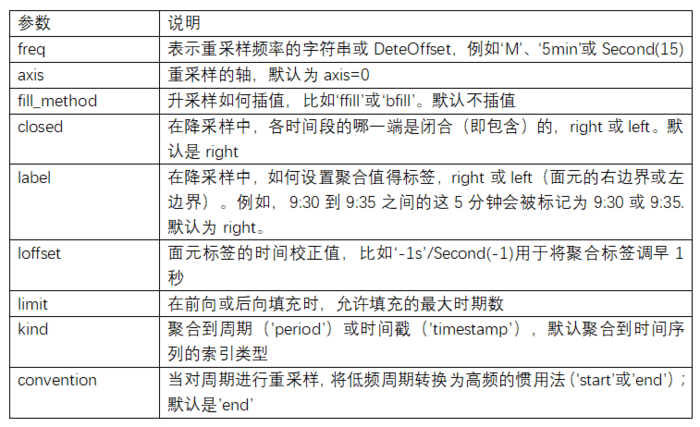
 # 降采样
将数据聚合到规律的低频率是一件非常普通的时间序列处理任务。待聚合的数据不必拥有固定的频率，期望的频率会自动定义聚合的面元边界，这些面元用于将时间序列拆分为多个片段。例如，要转换到月度频率（'M'或'BM'），数据需要被划分到多个单月时间段中。各时间段都是半开放的。一个数据点只能属于一个时间段，所有时间段的并集必须能组成整个时间帧。在用resample对数据进行降采样时，需要考虑两样东西：
* 各区间哪边是闭合的。
* 如何标记各个聚合面元，用区间的开头还是末尾。

In [81]:
df.resample('2W',closed='right',label='right').sum()

,open,close,high,low,volume
date,,,,,
2018-05-13,3440.401,3491.584,3522.791,3423.510,258853.0
2018-05-27,7217.845,7214.681,7292.851,7146.084,308888.0
2018-06-10,7456.359,7502.109,7586.835,7384.903,478329.0
2018-06-24,6902.453,6908.030,6999.787,6821.236,369013.0
2018-07-08,7252.890,7199.080,7349.390,7103.390,470235.0
2018-07-22,7351.560,7373.740,7432.510,7273.470,296364.0
2018-08-05,3700.530,3695.460,3731.530,3647.250,143500.0


# OHLC重采样
金融领域中有一种无所不在的时间序列聚合方式，即计算各面元的四个值：第一个值（open，开盘）、最后一个值（close，收盘）、最大值（high，最高）以及最小值（low，最低）。传入how='ohlc'即可得到一个含有这四种聚合值的DataFrame。整个过程很高效，只需一次扫描即可计算出结果：

In [82]:
df.close.resample('2W').ohlc()

,open,high,low,close
date,,,,
2018-05-13,688.396,707.968,688.396,707.968
2018-05-27,732.016,732.657,705.384,706.824
2018-06-10,730.034,777.017,715.708,767.059
2018-06-24,764.870,788.001,738.000,766.530
2018-07-08,765.560,765.560,690.910,714.120
2018-07-22,727.240,754.680,719.580,741.130
2018-08-05,732.070,745.400,732.070,738.560


# 升采样和插值

In [84]:
df.resample('12H').asfreq().head()

,open,close,high,low,volume,code
date,,,,,,
2018-05-07 00:00:00,650.711,688.396,692.054,648.561,85591.0,600519
2018-05-07 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-08 00:00:00,688.258,698.906,702.160,688.258,62497.0,600519
2018-05-08 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09 00:00:00,699.153,692.123,702.328,687.360,32331.0,600519


In [85]:
df.resample('12H').ffill().head()

,open,close,high,low,volume,code
date,,,,,,
2018-05-07 00:00:00,650.711,688.396,692.054,648.561,85591.0,600519
2018-05-07 12:00:00,650.711,688.396,692.054,648.561,85591.0,600519
2018-05-08 00:00:00,688.258,698.906,702.160,688.258,62497.0,600519
2018-05-08 12:00:00,688.258,698.906,702.160,688.258,62497.0,600519
2018-05-09 00:00:00,699.153,692.123,702.328,687.360,32331.0,600519


In [86]:
df.resample('12H').ffill(limit=2).head(11)

,open,close,high,low,volume,code
date,,,,,,
2018-05-07 00:00:00,650.711,688.396,692.054,648.561,85591.0,600519
2018-05-07 12:00:00,650.711,688.396,692.054,648.561,85591.0,600519
2018-05-08 00:00:00,688.258,698.906,702.160,688.258,62497.0,600519
2018-05-08 12:00:00,688.258,698.906,702.160,688.258,62497.0,600519
2018-05-09 00:00:00,699.153,692.123,702.328,687.360,32331.0,600519
2018-05-09 12:00:00,699.153,692.123,702.328,687.360,32331.0,600519
2018-05-10 00:00:00,693.651,704.191,705.976,693.651,39293.0,600519
2018-05-10 12:00:00,693.651,704.191,705.976,693.651,39293.0,600519
2018-05-11 00:00:00,708.628,707.968,720.273,705.680,39141.0,600519


# 移动窗口函数
在移动窗口（可以带有指数衰减权数）上计算的各种统计函数也是一类常见于时间序列的数组变换。这样可以圆滑噪音数据或断裂数据。我将它们称为移动窗口函数（moving window function），其中还包括那些窗口不定长的函数（如指数加权移动平均）。跟其他统计函数一样，移动窗口函数也会自动排除缺失值。<br>
它与resample和groupby很像。

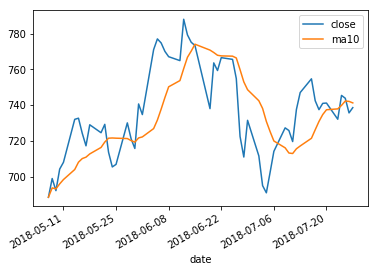

In [89]:
import matplotlib.pyplot as plt
df.close.plot(label='close')
df.close.rolling(window=10,min_periods=0).mean().plot(label='ma10')
plt.legend()

rolling函数也可以接受一个指定固定大小时间补偿字符串，而不是一组时期。这样可以方便处理不规律的时间序列。这些字符串也可以传递给resample。

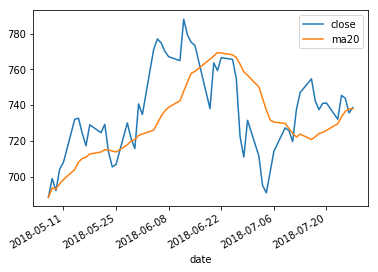

In [92]:
df.close.plot(label='close')
df.close.rolling(window='20D').mean().plot(label='ma20')
plt.legend()

# 指数加权函数
另一种使用固定大小窗口及相等权数观测值的办法是，定义一个衰减因子（decay factor）常量，以便使近期的观测值拥有更大的权数。衰减因子的定义方式有很多，比较流行的是使用时间间隔（span），它可以使结果兼容于窗口大小等于时间间隔的简单移动窗口（simple moving window）函数。<br>

由于指数加权统计会赋予近期的观测值更大的权数，因此相对于等权统计，它能“适应”更快的变化。

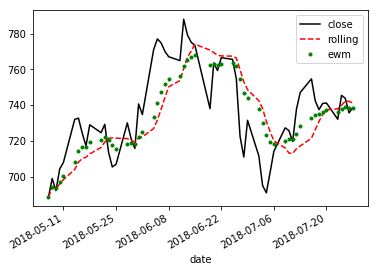

In [93]:
df.close.plot(style='k-',label='close')
df.close.rolling(window=10,min_periods=0).mean().plot(style='r--',label='rolling')
df.close.ewm(span=10).mean().plot(style='g.',label='ewm')
plt.legend()

# 二元移动窗口函数
有些统计运算（如相关系数和协方差）需要在两个时间序列上执行。例如，金融分析师常常对某只股票对某个参考指数（如标准普尔500指数）的相关系数感兴趣。

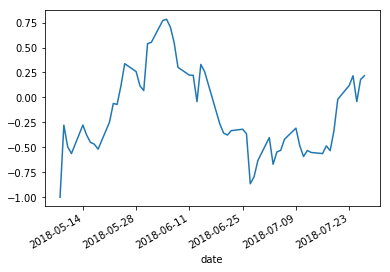

In [97]:
df.close.rolling(window=10,min_periods=0).corr(df.volume).plot()

# 用户定义的移动窗口函数
rolling_apply函数使你能够在移动窗口上应用自己设计的数组函数。唯一要求的就是：该函数要能从数组的各个片段中产生单个值（即约简）。

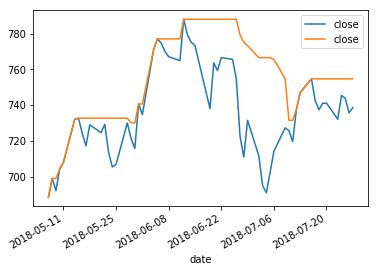

In [103]:
df.close.plot()
df.close.rolling(window=10,min_periods=0).apply(lambda x:x.max(),raw=True).plot()
plt.legend()